# Assignment 3: Data Mining in Action - Dean Stokeld 24923029

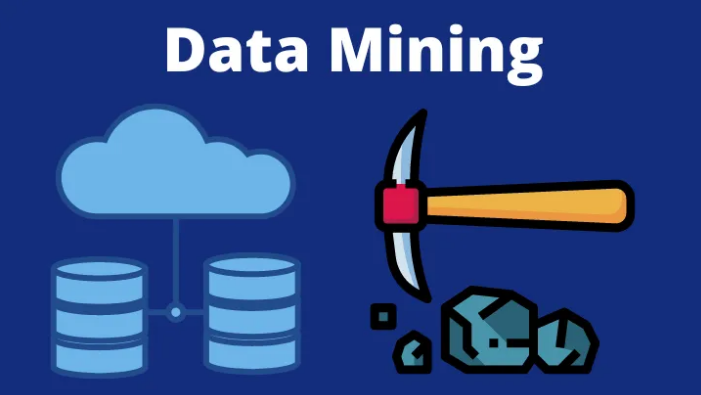

## Importing datasets

In [171]:
import pandas as pd

healthcare_data = pd.read_csv('Assignment3-Healthcare-Dataset.csv')
unknown_healthcare_data = pd.read_csv('Assignment3-Unknown-Dataset.csv')

## Checking for missing data 

In [172]:
missing_val = healthcare_data.isnull().sum()
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)
missing_perc = (missing_val / len(healthcare_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_val, 'Percentage (%)': missing_perc})

print(missing_data)

                Missing Values  Percentage (%)
LOSgroupNum              42447       89.968207
marital_status            8179       17.335735
NumCallouts               2370        5.023315
age                       2339        4.957609
religion                   372        0.788470
AdmitDiagnosis              20        0.042391


In [173]:
missing_val = unknown_healthcare_data.isnull().sum()
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)
missing_perc = (missing_val / len(unknown_healthcare_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_val, 'Percentage (%)': missing_perc})

print(missing_data)

                Missing Values  Percentage (%)
LOSgroupNum              10631       90.123771
marital_status            1949       16.522550
age                        609        5.162767
NumCallouts                578        4.899966
religion                    86        0.729061
AdmitDiagnosis               5        0.042387


## Preprocessing

### Setting all ages to 0 for all instances of  AdmitDiagnosis == 'NEWBORN' 

In [174]:
for i, row in healthcare_data.iterrows():
    if row['AdmitDiagnosis'] == 'NEWBORN':
        healthcare_data.at[i, 'age'] = 0
        
for i, row in unknown_healthcare_data.iterrows():
    if row['AdmitDiagnosis'] == 'NEWBORN':
        unknown_healthcare_data.at[i, 'age'] = 0

### Setting all patient's with an age less than 18 a marital status of 'SINGLE'

In [175]:
healthcare_data.loc[healthcare_data['age'] < 18, 'marital_status'] = 'SINGLE'

unknown_healthcare_data.loc[unknown_healthcare_data['age'] < 18, 'marital_status'] = 'SINGLE'

### Checking the remaining missing values 

In [176]:
missing_val = healthcare_data.isnull().sum()
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)
missing_perc = (missing_val / len(healthcare_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_val, 'Percentage (%)': missing_perc})

print(missing_data)

                Missing Values  Percentage (%)
LOSgroupNum              42447       89.968207
NumCallouts               2370        5.023315
age                       2036        4.315388
marital_status            1921        4.071641
religion                   372        0.788470
AdmitDiagnosis              20        0.042391


In [177]:
missing_val = unknown_healthcare_data.isnull().sum()
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)
missing_perc = (missing_val / len(unknown_healthcare_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_val, 'Percentage (%)': missing_perc})

print(missing_data)

                Missing Values  Percentage (%)
LOSgroupNum              10631       90.123771
NumCallouts                578        4.899966
age                        524        4.442184
marital_status             431        3.653781
religion                    86        0.729061
AdmitDiagnosis               5        0.042387


### Assigning missing LOSgroupNum values based on LOSdays

In [178]:
import random
import numpy as np

healthcare_data['LOSgroupNum'] = np.nan
unknown_healthcare_data['LOSgroupNum'] = np.nan

for i, row in healthcare_data.iterrows():
    if pd.isna(row['LOSgroupNum']):
        if row['LOSdays'] < 4:
            healthcare_data.at[i, 'LOSgroupNum'] = 1
        elif row['LOSdays'] == 4:
            healthcare_data.at[i, 'LOSgroupNum'] = random.choice([1, 2])
        elif row['LOSdays'] < 8:
            healthcare_data.at[i, 'LOSgroupNum'] = 2
        elif row['LOSdays'] == 8:
            healthcare_data.at[i, 'LOSgroupNum'] = random.choice([2, 3])
        elif row['LOSdays'] < 12:
            healthcare_data.at[i, 'LOSgroupNum'] = 3
        elif row['LOSdays'] == 12:
            healthcare_data.at[i, 'LOSgroupNum'] = random.choice([3, 4])
        elif row['LOSdays'] > 12:
            healthcare_data.at[i, 'LOSgroupNum'] = 4
            
for i, row in unknown_healthcare_data.iterrows():
    if pd.isna(row['LOSgroupNum']):
        if row['LOSdays'] < 4:
            unknown_healthcare_data.at[i, 'LOSgroupNum'] = 1
        elif row['LOSdays'] == 4:
            unknown_healthcare_data.at[i, 'LOSgroupNum'] = random.choice([1, 2])
        elif row['LOSdays'] < 8:
            unknown_healthcare_data.at[i, 'LOSgroupNum'] = 2
        elif row['LOSdays'] == 8:
            unknown_healthcare_data.at[i, 'LOSgroupNum'] = random.choice([2, 3])
        elif row['LOSdays'] < 12:
            unknown_healthcare_data.at[i, 'LOSgroupNum'] = 3
        elif row['LOSdays'] == 12:
            unknown_healthcare_data.at[i, 'LOSgroupNum'] = random.choice([3, 4])
        elif row['LOSdays'] > 12:
            unknown_healthcare_data.at[i, 'LOSgroupNum'] = 4

### Filling missing ages with a random age between -20 and +20 of the median 

In [179]:
for i, row in healthcare_data.iterrows():
    if pd.isna(row['age']):
        healthcare_data.at[i, 'age'] = random.randint(
            int(healthcare_data['age'].median() - 20),
            int(healthcare_data['age'].median() + 20))
        
for i, row in unknown_healthcare_data.iterrows():
    if pd.isna(row['age']):
        unknown_healthcare_data.at[i, 'age'] = random.randint(
            int(unknown_healthcare_data['age'].median() - 20),
            int(unknown_healthcare_data['age'].median() + 20))

### Filling missing NumCallouts with median 

In [180]:
healthcare_data['NumCallouts'].fillna(healthcare_data['NumCallouts'].median(), inplace=True)

unknown_healthcare_data['NumCallouts'].fillna(unknown_healthcare_data['NumCallouts'].median(), inplace=True)

### Checking the remaining missing values 

In [181]:
missing_val = healthcare_data.isnull().sum()
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)
missing_perc = (missing_val / len(healthcare_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_val, 'Percentage (%)': missing_perc})

print(missing_data)

                Missing Values  Percentage (%)
marital_status            1921        4.071641
religion                   372        0.788470
AdmitDiagnosis              20        0.042391


In [182]:
missing_val = unknown_healthcare_data.isnull().sum()
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)
missing_perc = (missing_val / len(unknown_healthcare_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_val, 'Percentage (%)': missing_perc})

print(missing_data)

                Missing Values  Percentage (%)
marital_status             431        3.653781
religion                    86        0.729061
AdmitDiagnosis               5        0.042387


### Filling missing values in marital_status, religion and AdmitDiagnosis with 'NA'

In [183]:
healthcare_data['marital_status'].fillna('NA', inplace=True)
healthcare_data['religion'].fillna('NA', inplace=True)
healthcare_data['AdmitDiagnosis'].fillna('NA', inplace=True)

unknown_healthcare_data['marital_status'].fillna('NA', inplace=True)
unknown_healthcare_data['religion'].fillna('NA', inplace=True)
unknown_healthcare_data['AdmitDiagnosis'].fillna('NA', inplace=True)

### Checking the remaining missing values 

In [184]:
missing_val = healthcare_data.isnull().sum()
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)
missing_perc = (missing_val / len(healthcare_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_val, 'Percentage (%)': missing_perc})

print(missing_data)

Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


In [185]:
missing_val = unknown_healthcare_data.isnull().sum()
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)
missing_perc = (missing_val / len(unknown_healthcare_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_val, 'Percentage (%)': missing_perc})

print(missing_data)

Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


### Saving preprocessed data for later 

In [186]:
healthcare_data.to_csv('healthcare_data.csv')
unknown_healthcare_data.to_csv('unknown_healthcare_data.csv')

## Splitting data into training and evaluation sets

In [187]:
from sklearn.model_selection import train_test_split

X = healthcare_data.drop('ExpiredHospital', axis=1)
y = healthcare_data['ExpiredHospital']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

((37744, 26), (9436, 26), (37744,), (9436,))

## Encoding categorical variables to numerical data

### One-hot encoding

In [188]:
X_train_hot = pd.get_dummies(X_train)
X_val_hot = pd.get_dummies(X_val)
unknown_healthcare_data_hot = pd.get_dummies(unknown_healthcare_data)

X_val_hot = X_val_hot.reindex(columns=X_train_hot.columns)

### Label encoding

In [189]:
from sklearn.preprocessing import LabelEncoder

combined = pd.concat([X_train, X_val, unknown_healthcare_data], axis=0)

categorical_cols = combined.select_dtypes(include=[object, 'category']).columns
for column in categorical_cols: 
    combined[column] = LabelEncoder().fit_transform(combined[column])

train_len = len(X_train)
val_len = len(X_val)

X_train = combined.iloc[:train_len]
X_val = combined.iloc[train_len:train_len+val_len]
unknown_healthcare_data = combined.iloc[train_len+val_len:]

## Random Forest (RF)

### Using label encoded data

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9389
F1 Score: 0.6083
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8486
           1       0.86      0.47      0.61       950

    accuracy                           0.94      9436
   macro avg       0.90      0.73      0.79      9436
weighted avg       0.93      0.94      0.93      9436

Confusion Matrix: 
[[8411   75]
 [ 502  448]]


### ROC Curve 

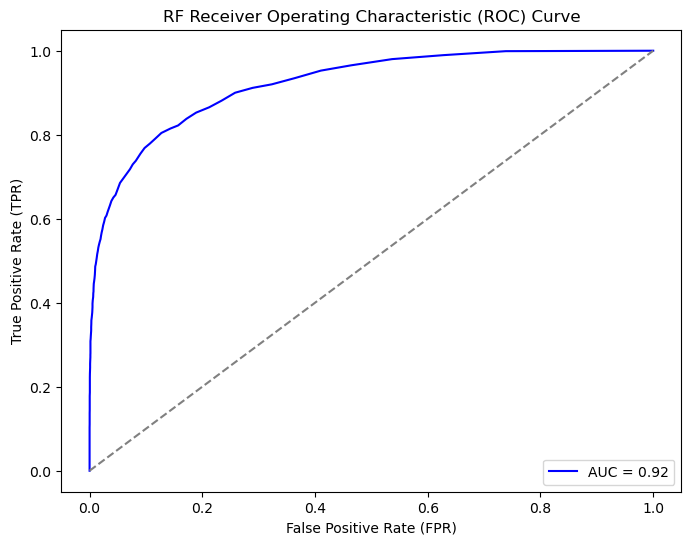

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

probabilities = rf_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('RF Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

### Using one-hot encoded data

In [25]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_hot, y_train)

predictions = rf_model.predict(X_val_hot)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9339
F1 Score: 0.5398
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.96      8486
           1       0.90      0.39      0.54       950

    accuracy                           0.93      9436
   macro avg       0.92      0.69      0.75      9436
weighted avg       0.93      0.93      0.92      9436

Confusion Matrix: 
[[8446   40]
 [ 584  366]]


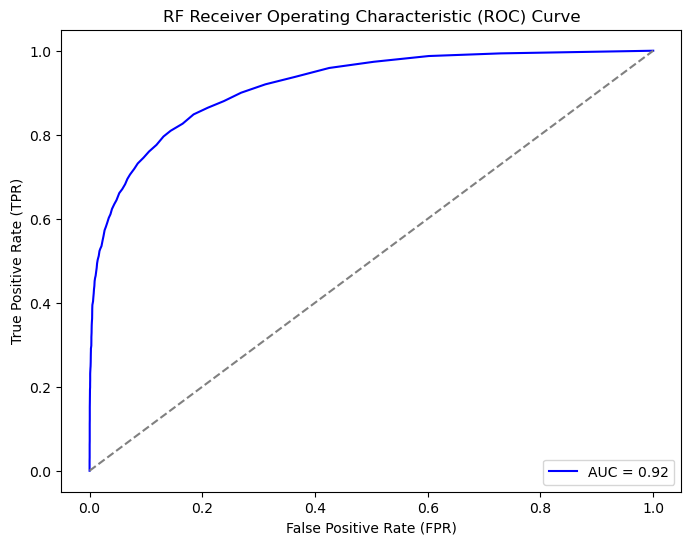

In [26]:
probabilities = rf_model.predict_proba(X_val_hot)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('RF Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## Decision Tree (DT)

### Using label encoded data

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

predictions = dt_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.8889
F1 Score: 0.4843
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8486
           1       0.45      0.52      0.48       950

    accuracy                           0.89      9436
   macro avg       0.70      0.72      0.71      9436
weighted avg       0.90      0.89      0.89      9436

Confusion Matrix: 
[[7896  590]
 [ 458  492]]


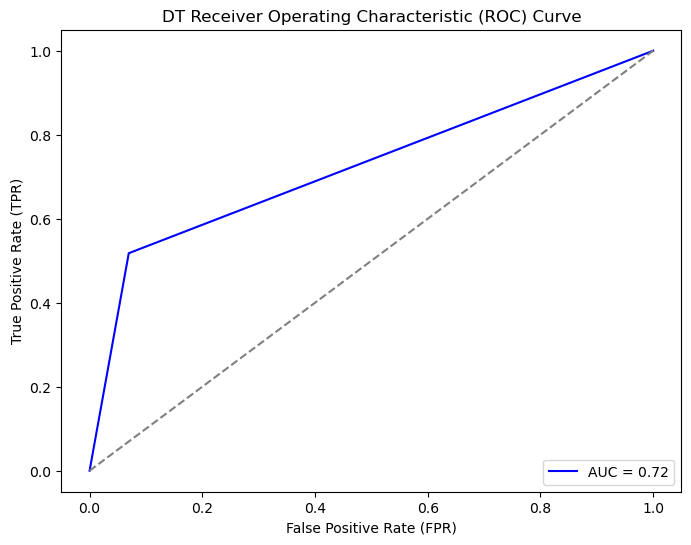

In [28]:
probabilities = dt_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('DT Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

### Using one-hot encoded data 

In [29]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_hot, y_train)

predictions = dt_model.predict(X_val_hot)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9113
F1 Score: 0.5414
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      8486
           1       0.56      0.52      0.54       950

    accuracy                           0.91      9436
   macro avg       0.76      0.74      0.75      9436
weighted avg       0.91      0.91      0.91      9436

Confusion Matrix: 
[[8105  381]
 [ 456  494]]


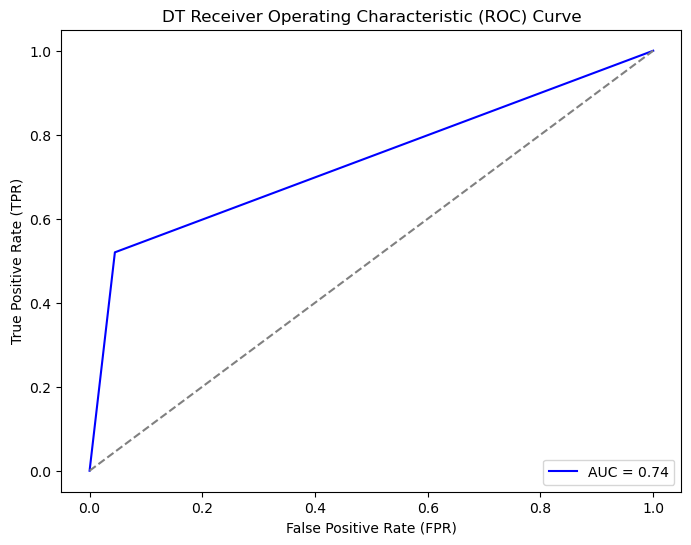

In [30]:
probabilities = dt_model.predict_proba(X_val_hot)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('DT Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## XGBoost (XGB)

### Using label encoded data

In [102]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

predictions = xgb_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9419
F1 Score: 0.6553
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8486
           1       0.81      0.55      0.66       950

    accuracy                           0.94      9436
   macro avg       0.88      0.77      0.81      9436
weighted avg       0.94      0.94      0.94      9436

Confusion Matrix: 
[[8367  119]
 [ 429  521]]


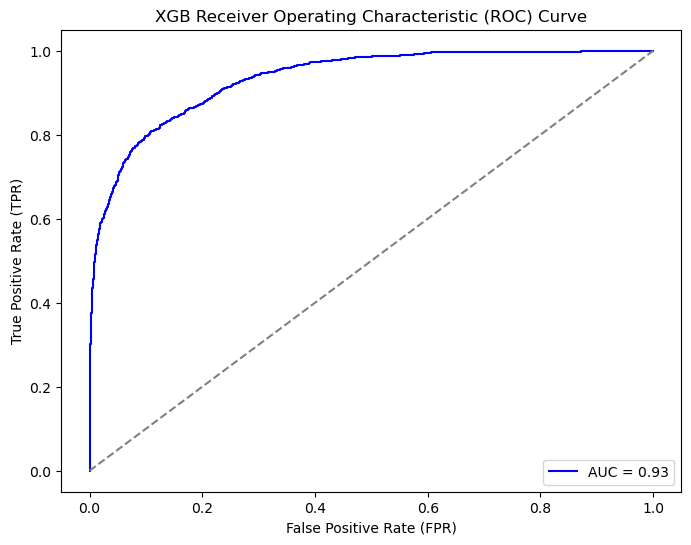

In [105]:
probabilities = xgb_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('XGB Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## LightGBM (LGBM)

### Using label encoded data

In [114]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

predictions = lgbm_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9422
F1 Score: 0.6495
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8486
           1       0.83      0.53      0.65       950

    accuracy                           0.94      9436
   macro avg       0.89      0.76      0.81      9436
weighted avg       0.94      0.94      0.94      9436

Confusion Matrix: 
[[8386  100]
 [ 445  505]]


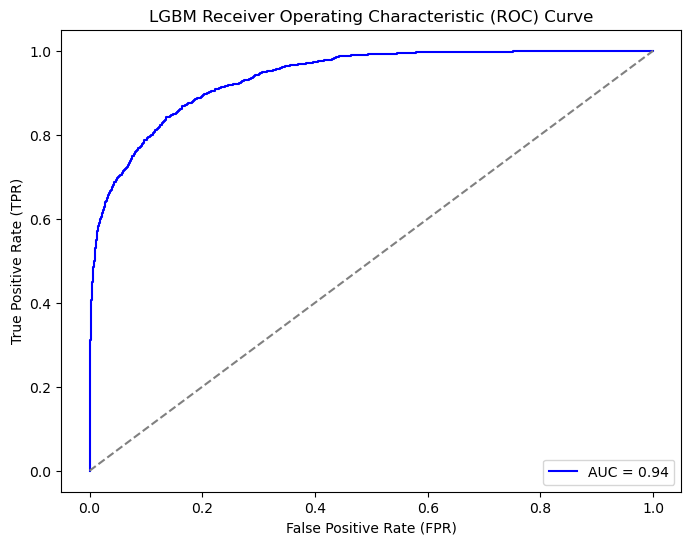

In [104]:
probabilities = lgbm_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('LGBM Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## CatBoost

### Using label encoded data

In [35]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(random_state=42)
catboost_model.fit(X_train, y_train)

predictions = catboost_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Learning rate set to 0.048557
0:	learn: 0.6327046	total: 146ms	remaining: 2m 26s
1:	learn: 0.5793610	total: 154ms	remaining: 1m 16s
2:	learn: 0.5338666	total: 160ms	remaining: 53.3s
3:	learn: 0.4937551	total: 166ms	remaining: 41.4s
4:	learn: 0.4606150	total: 172ms	remaining: 34.2s
5:	learn: 0.4284821	total: 177ms	remaining: 29.4s
6:	learn: 0.4018992	total: 183ms	remaining: 25.9s
7:	learn: 0.3768983	total: 189ms	remaining: 23.4s
8:	learn: 0.3575416	total: 195ms	remaining: 21.4s
9:	learn: 0.3417602	total: 200ms	remaining: 19.8s
10:	learn: 0.3245145	total: 206ms	remaining: 18.5s
11:	learn: 0.3111796	total: 211ms	remaining: 17.4s
12:	learn: 0.2970606	total: 217ms	remaining: 16.5s
13:	learn: 0.2857917	total: 223ms	remaining: 15.7s
14:	learn: 0.2755040	total: 228ms	remaining: 15s
15:	learn: 0.2673550	total: 234ms	remaining: 14.4s
16:	learn: 0.2608464	total: 240ms	remaining: 13.9s
17:	learn: 0.2541321	total: 245ms	remaining: 13.4s
18:	learn: 0.2476513	total: 251ms	remaining: 13s
19:	learn: 0.

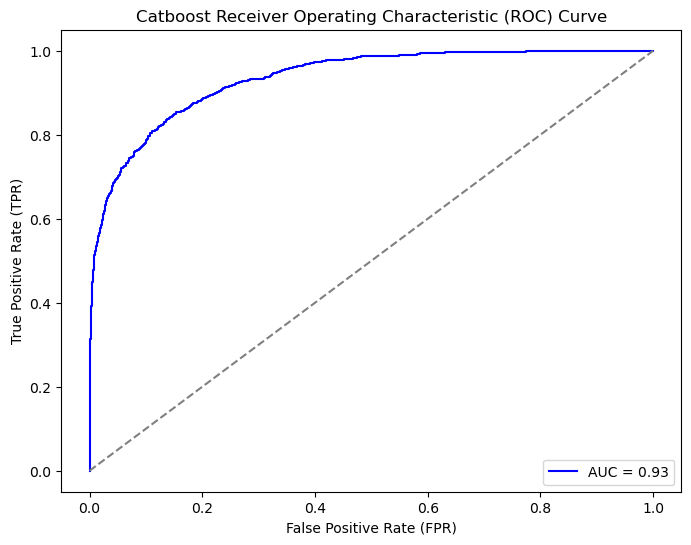

In [36]:
probabilities = catboost_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('Catboost Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

### Using one-hot encoded data 

In [37]:
catboost_model = CatBoostClassifier(random_state=42)
catboost_model.fit(X_train_hot, y_train)

predictions = catboost_model.predict(X_val_hot)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Learning rate set to 0.048557
0:	learn: 0.6358016	total: 20.2ms	remaining: 20.1s
1:	learn: 0.5835663	total: 39.8ms	remaining: 19.9s
2:	learn: 0.5362489	total: 58.9ms	remaining: 19.6s
3:	learn: 0.4963190	total: 78.3ms	remaining: 19.5s
4:	learn: 0.4595252	total: 97.7ms	remaining: 19.4s
5:	learn: 0.4267833	total: 118ms	remaining: 19.5s
6:	learn: 0.3965831	total: 138ms	remaining: 19.5s
7:	learn: 0.3748145	total: 157ms	remaining: 19.5s
8:	learn: 0.3530005	total: 177ms	remaining: 19.4s
9:	learn: 0.3355795	total: 196ms	remaining: 19.4s
10:	learn: 0.3199980	total: 216ms	remaining: 19.4s
11:	learn: 0.3067465	total: 236ms	remaining: 19.4s
12:	learn: 0.2967902	total: 255ms	remaining: 19.4s
13:	learn: 0.2857130	total: 275ms	remaining: 19.4s
14:	learn: 0.2772726	total: 295ms	remaining: 19.4s
15:	learn: 0.2687851	total: 314ms	remaining: 19.3s
16:	learn: 0.2622700	total: 334ms	remaining: 19.3s
17:	learn: 0.2550920	total: 354ms	remaining: 19.3s
18:	learn: 0.2493416	total: 374ms	remaining: 19.3s
19:	le

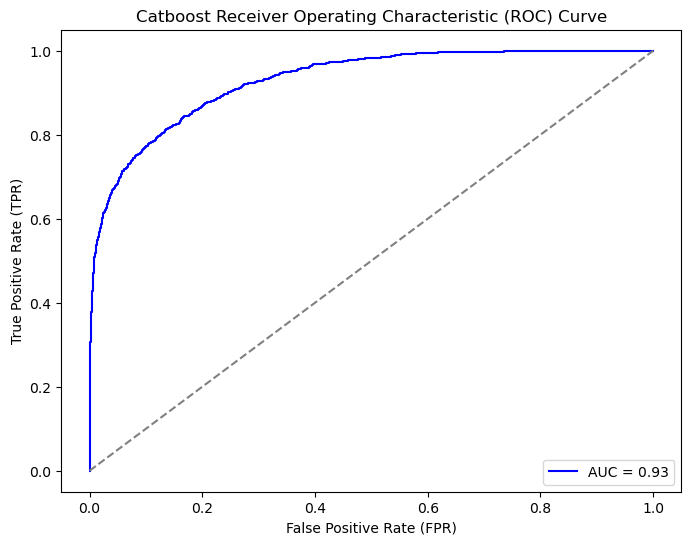

In [38]:
probabilities = catboost_model.predict_proba(X_val_hot)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('Catboost Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## Support Vector Machine (SVM)

### Using one-hot encoded data

In [67]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train_hot, y_train)

predictions = svm_model.predict(X_val_hot)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9212
F1 Score: 0.4259
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8486
           1       0.80      0.29      0.43       950

    accuracy                           0.92      9436
   macro avg       0.86      0.64      0.69      9436
weighted avg       0.91      0.92      0.90      9436

Confusion Matrix: 
[[8416   70]
 [ 674  276]]


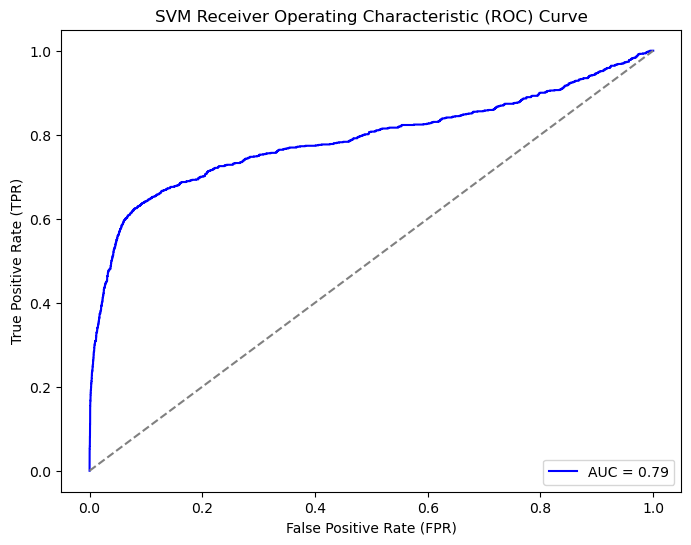

In [72]:
distances = svm_model.decision_function(X_val_hot)

fpr, tpr, thresholds = roc_curve(y_val, distances)

auc = roc_auc_score(y_val, distances)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('SVM Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## Gaussian Naive Bayes (GNB)

### Using label encoded data

In [44]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

predictions = gnb_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.8990
F1 Score: 0.4685
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      8486
           1       0.50      0.44      0.47       950

    accuracy                           0.90      9436
   macro avg       0.72      0.70      0.71      9436
weighted avg       0.89      0.90      0.90      9436

Confusion Matrix: 
[[8063  423]
 [ 530  420]]


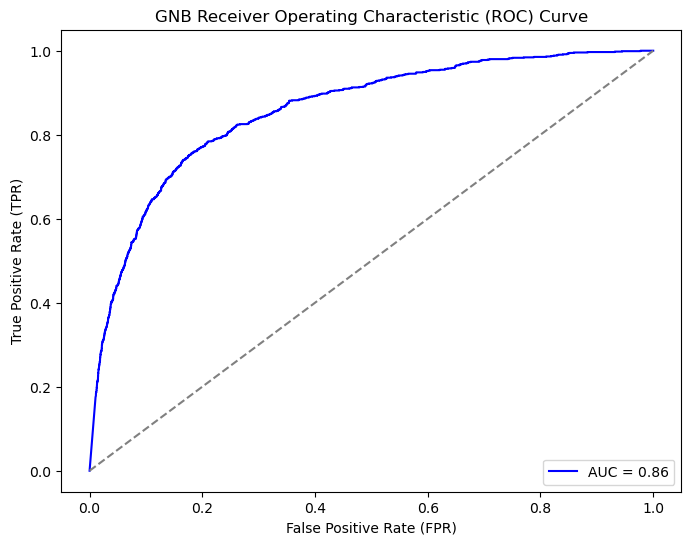

In [46]:
probabilities = gnb_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('GNB Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## Logistic Regression (LogReg)

### Using one-hot encoded data

In [69]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_hot, y_train)

predictions = logreg_model.predict(X_val_hot)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9298
F1 Score: 0.5428
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8486
           1       0.79      0.41      0.54       950

    accuracy                           0.93      9436
   macro avg       0.86      0.70      0.75      9436
weighted avg       0.92      0.93      0.92      9436

Confusion Matrix: 
[[8381  105]
 [ 557  393]]


C:\Users\Dean\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


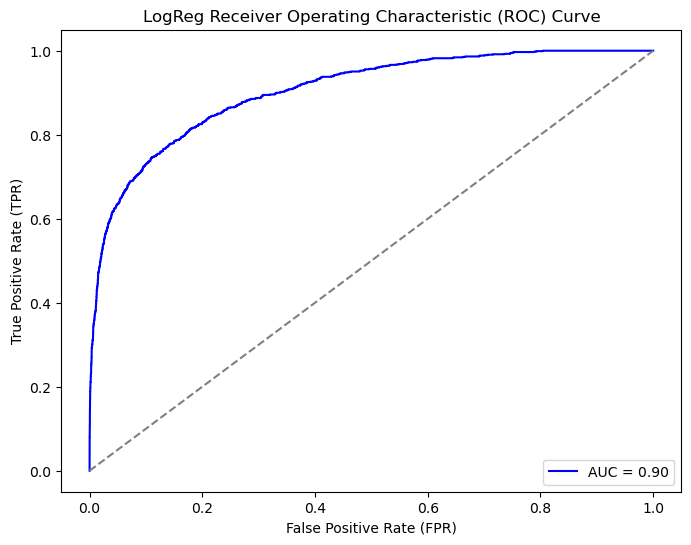

In [70]:
probabilities = logreg_model.predict_proba(X_val_hot)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('LogReg Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## Neural Network (NN)

### Using one-hot encoded data

In [52]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_hot, y_train)

predictions = nn_model.predict(X_val_hot)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9361
F1 Score: 0.5895
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8486
           1       0.83      0.46      0.59       950

    accuracy                           0.94      9436
   macro avg       0.89      0.72      0.78      9436
weighted avg       0.93      0.94      0.93      9436

Confusion Matrix: 
[[8400   86]
 [ 517  433]]


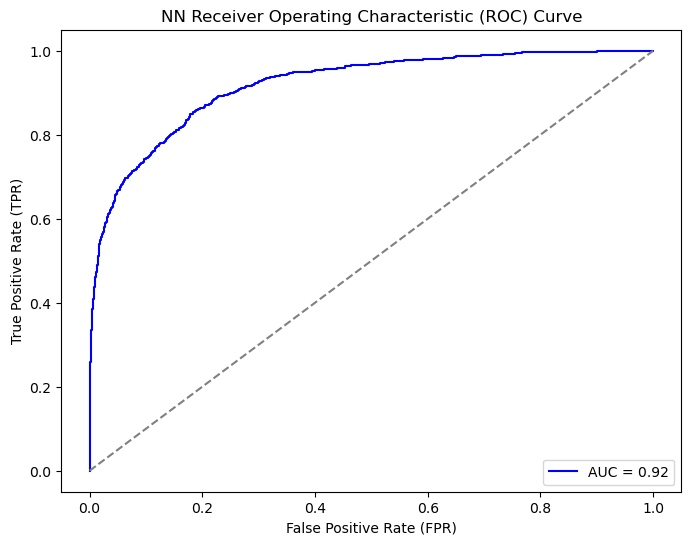

In [56]:
probabilities = nn_model.predict_proba(X_val_hot)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('NN Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## K-Nearest Neighbors (KNN)

### Using one-hot encoded data

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(algorithm='brute')
knn_model.fit(X_train_hot, y_train)

predictions = knn_model.predict(X_val_hot)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9220
F1 Score: 0.5113
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8486
           1       0.69      0.41      0.51       950

    accuracy                           0.92      9436
   macro avg       0.81      0.69      0.73      9436
weighted avg       0.91      0.92      0.91      9436

Confusion Matrix: 
[[8315  171]
 [ 565  385]]


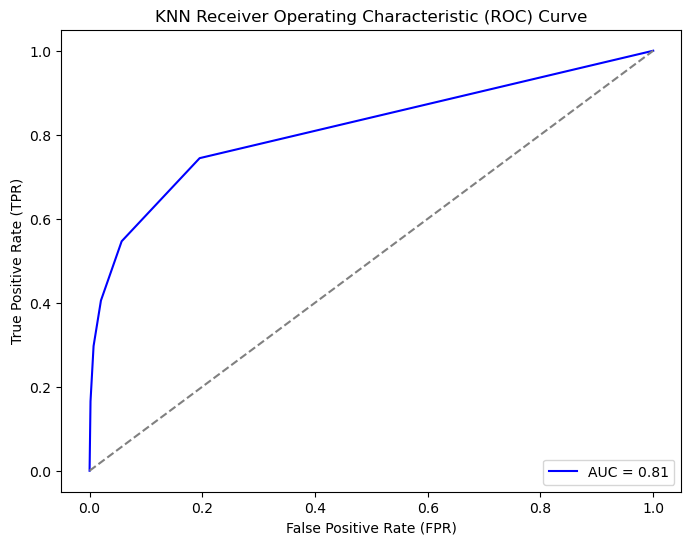

In [64]:
probabilities = knn_model.predict_proba(X_val_hot)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('KNN Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## Stacking

### Using label encoded data

In [65]:
from sklearn.ensemble import StackingClassifier

stacking_model = StackingClassifier(estimators=[
    ('rf', rf_model), 
    ('dt', dt_model), 
    ('xgb', xgb_model), 
    ('lgbm', lgbm_model), 
    ('catboost', catboost_model)], final_estimator=XGBClassifier())
stacking_model.fit(X_train, y_train)
predictions = stacking_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

[LightGBM] [Info] Number of positive: 3799, number of negative: 33945
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2668
[LightGBM] [Info] Number of data points in the train set: 37744, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100652 -> initscore=-2.190004
[LightGBM] [Info] Start training from score -2.190004
Learning rate set to 0.048557
0:	learn: 0.6327046	total: 8.47ms	remaining: 8.46s
1:	learn: 0.5793610	total: 16.6ms	remaining: 8.29s
2:	learn: 0.5338666	total: 24.4ms	remaining: 8.1s
3:	learn: 0.4937551	total: 32.1ms	remaining: 7.99s
4:	learn: 0.4606150	total: 39.8ms	remaining: 7.92s
5:	learn: 0.4284821	total: 47.4ms	remaining: 7.85s
6:	learn: 0.4018992	total: 55.1ms	remaining: 7.82s
7:	learn: 0.3768983	total: 63.3ms	remaining: 7.85s
8:	learn: 0.3575416	total: 71.2ms	remaining: 7.83s
9:	learn: 0.3417602

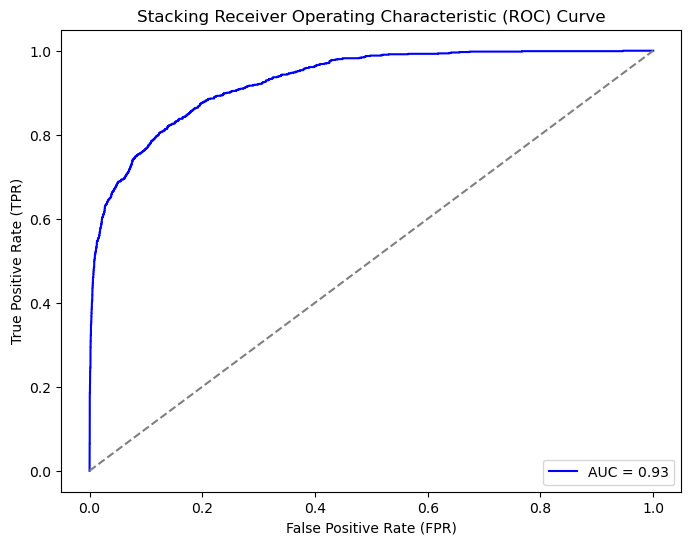

In [66]:
probabilities = stacking_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('Stacking Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## Principal component analysis (PCA)

In [190]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_hot_scaled = scaler.fit_transform(X_train_hot)
X_val_hot_scaled = scaler.transform(X_val_hot)

X_train_hot_scaled = np.nan_to_num(X_train_hot_scaled, copy=False)
X_val_hot_scaled = np.nan_to_num(X_val_hot_scaled, copy=False)

n_components = 10
pca = PCA(n_components=n_components)

X_train_hot_pca = pca.fit_transform(X_train_hot_scaled)
X_val_hot_pca = pca.transform(X_val_hot_scaled)

## Neural Network (NN)

### Training a neural network on one-hot encoded reduced data

In [191]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_hot_pca, y_train)

predictions = nn_model.predict(X_val_hot_pca)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9254
F1 Score: 0.4816
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8486
           1       0.80      0.34      0.48       950

    accuracy                           0.93      9436
   macro avg       0.87      0.67      0.72      9436
weighted avg       0.92      0.93      0.91      9436

Confusion Matrix: 
[[8405   81]
 [ 623  327]]


C:\Users\Dean\anaconda3\envs\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


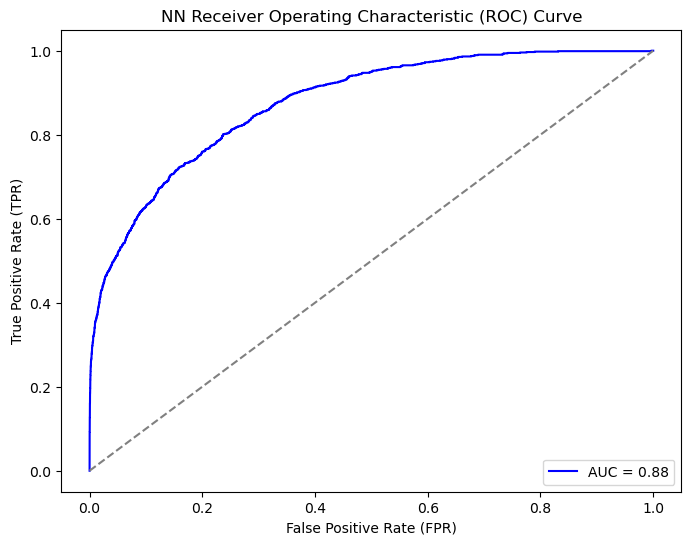

In [192]:
probabilities = nn_model.predict_proba(X_val_hot_pca)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('NN Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## Resampling

### SMOTE

In [193]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_resampled_smote, y_resampled_smote)

predictions = lgbm_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9368
F1 Score: 0.6498
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8486
           1       0.74      0.58      0.65       950

    accuracy                           0.94      9436
   macro avg       0.84      0.78      0.81      9436
weighted avg       0.93      0.94      0.93      9436

Confusion Matrix: 
[[8287  199]
 [ 397  553]]


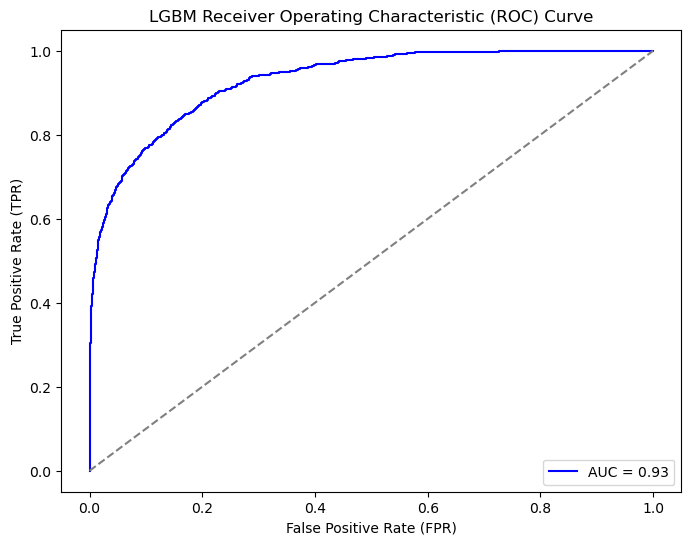

In [194]:
probabilities = lgbm_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('LGBM Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

### ADASYN 

In [195]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_resampled_ada, y_resampled_ada = adasyn.fit_resample(X_train, y_train)

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_resampled_ada, y_resampled_ada)

predictions = lgbm_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9377
F1 Score: 0.6561
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8486
           1       0.74      0.59      0.66       950

    accuracy                           0.94      9436
   macro avg       0.85      0.78      0.81      9436
weighted avg       0.93      0.94      0.93      9436

Confusion Matrix: 
[[8287  199]
 [ 389  561]]


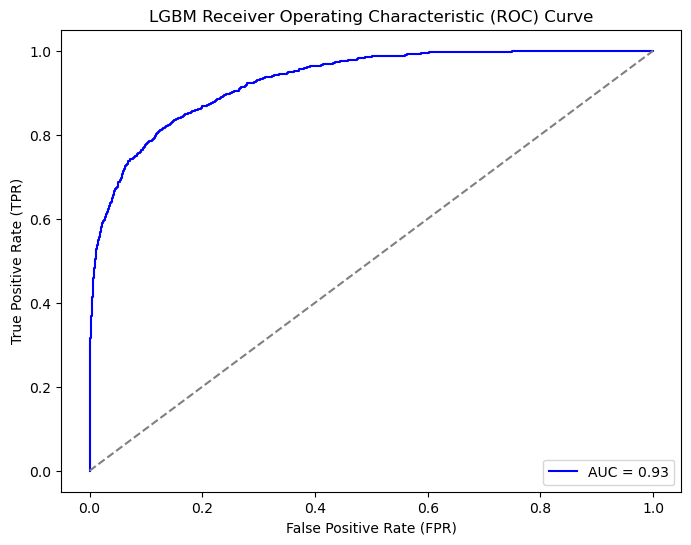

In [196]:
probabilities = lgbm_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('LGBM Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

### Random Undersampling 

In [197]:
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train, y_train)

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_resampled_ros, y_resampled_ros)

predictions = lgbm_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.8509
F1 Score: 0.5318
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8486
           1       0.39      0.84      0.53       950

    accuracy                           0.85      9436
   macro avg       0.68      0.85      0.72      9436
weighted avg       0.92      0.85      0.87      9436

Confusion Matrix: 
[[7230 1256]
 [ 151  799]]


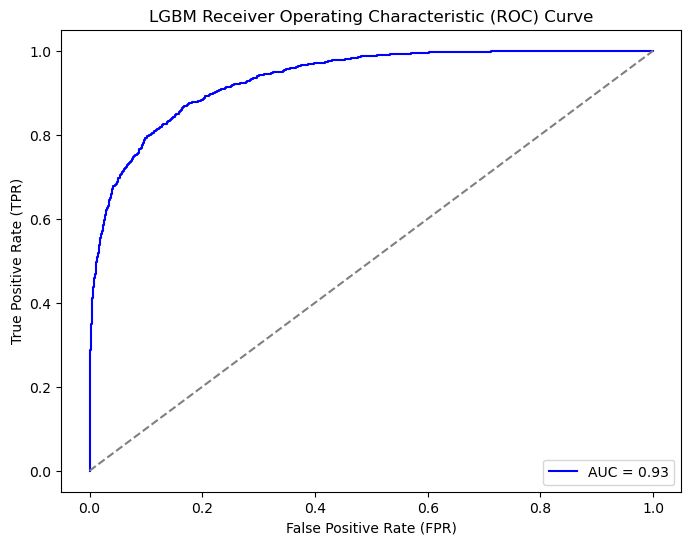

In [198]:
probabilities = lgbm_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('LGBM Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## Additional preprocessing the data for best model tuning 

### Loading preprocessed data from before 

In [201]:
healthcare_data = pd.read_csv('healthcare_data.csv')
unknown_healthcare_data = pd.read_csv('unknown_healthcare_data.csv')

### Dropping noisy data 

In [202]:
healthcare_data = healthcare_data.drop('NumCPTevents', axis=1)
healthcare_data = healthcare_data.drop('NumMicroLabs', axis=1)
healthcare_data = healthcare_data.drop('NumNotes', axis=1)
healthcare_data = healthcare_data.drop('NumProcEvents', axis=1)
healthcare_data = healthcare_data.drop('NumTransfers', axis=1)
healthcare_data = healthcare_data.drop('NumCallouts', axis=1)

unknown_healthcare_data = unknown_healthcare_data.drop('NumCPTevents', axis=1)
unknown_healthcare_data = unknown_healthcare_data.drop('NumMicroLabs', axis=1)
unknown_healthcare_data = unknown_healthcare_data.drop('NumNotes', axis=1)
unknown_healthcare_data = unknown_healthcare_data.drop('NumProcEvents', axis=1)
unknown_healthcare_data = unknown_healthcare_data.drop('NumTransfers', axis=1)
unknown_healthcare_data = unknown_healthcare_data.drop('NumCallouts', axis=1)

### Stripping leading spaces and replacing JSON characters in feature names

In [204]:
healthcare_data['AdmitDiagnosis'] = healthcare_data['AdmitDiagnosis'].str.strip()
unknown_healthcare_data['AdmitDiagnosis'] = unknown_healthcare_data['AdmitDiagnosis'].str.strip()
healthcare_data.columns = [col.replace(' ', '_').replace(':', '').replace('[', '').replace(
    ']', '') for col in healthcare_data.columns]
unknown_healthcare_data.columns = [col.replace(' ', '_').replace(':', '').replace('[', '').replace(
    ']', '') for col in unknown_healthcare_data.columns]

### Re-splitting data 

In [164]:
X = healthcare_data.drop('ExpiredHospital', axis=1)
y = healthcare_data['ExpiredHospital']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

((37744, 21), (9436, 21), (37744,), (9436,))

### Re-label encoding data 

In [165]:
combined = pd.concat([X_train, X_val, unknown_healthcare_data], axis=0)

categorical_cols = combined.select_dtypes(include=[object, 'category']).columns
for column in categorical_cols: 
    combined[column] = LabelEncoder().fit_transform(combined[column])

train_len = len(X_train)
val_len = len(X_val)

X_train = combined.iloc[:train_len]
X_val = combined.iloc[train_len:train_len+val_len]
unknown_healthcare_data = combined.iloc[train_len+val_len:]

## LightGBM Tuning 

### (Early stopping, feature selection, decision threshold, pseudo-labelling & hyperparameter tuning)

### Using one-hot encoded data

#### I tried oversampling the data using SMOTE & ADASYN and also tried undersampling the data but it only resulted in a lesser performing model as opposed to using the original data -  the same goes for any dimensionality reduction techniques.

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


param_grid = {
    'objective': ['binary'],
    'class_weight': ['balanced', None],
    'num_leaves': [31, 40, 50, 60, 70],
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'max_depth': [-1, 6, 8, 10],
    'min_child_samples': [10, 20, 30, 40],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'boosting_type': ['gbdt', 'dart'],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 1, 5, 10, 15],
    'n_estimators': [500, 1000, 2000, 3000]
}

lgbm_model = LGBMClassifier(metric='logloss',
                            random_state=42,
                            n_jobs=-1)

grid_search = HalvingGridSearchCV(lgbm_model,
                                  param_grid,
                                  cv=3,
                                  verbose=2,
                                  n_jobs=-1,
                                  factor=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_.fit(X_train, y_train)
probs = best_model.predict_proba(X_val)[:, 1]
high_confidence_indices = np.where(probs > 0.75)[0]
pseudo_labels = probs[high_confidence_indices] > 0.5
pseudo_labeled_data = X_val.iloc[high_confidence_indices]
X_train_augmented = pd.concat([X_train, pseudo_labeled_data])
y_train_augmented = np.concatenate([y_train, pseudo_labels])
best_model.fit(X_train_augmented, y_train_augmented)

top_17 = pd.DataFrame({
    'feature': X_train_augmented.columns,
    'importance': best_model.feature_importances_
}).nlargest(17, 'importance')['feature'].tolist()

X_train_ = X_train_augmented[top_17]
X_val_ = X_val[top_17]

best_model.fit(X_train_, y_train_augmented)

probs = best_model.predict_proba(X_val_)[:, 1]
predictions_adjusted = (probs > 0.4).astype(int)

accuracy = accuracy_score(y_val, predictions_adjusted)
f1 = f1_score(y_val, predictions_adjusted)
classification_rep = classification_report(y_val, predictions_adjusted)
confusion_mat = confusion_matrix(y_val, predictions_adjusted)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print('Classification Report: \n', classification_rep)
print('Confusion Matrix: \n', confusion_mat)

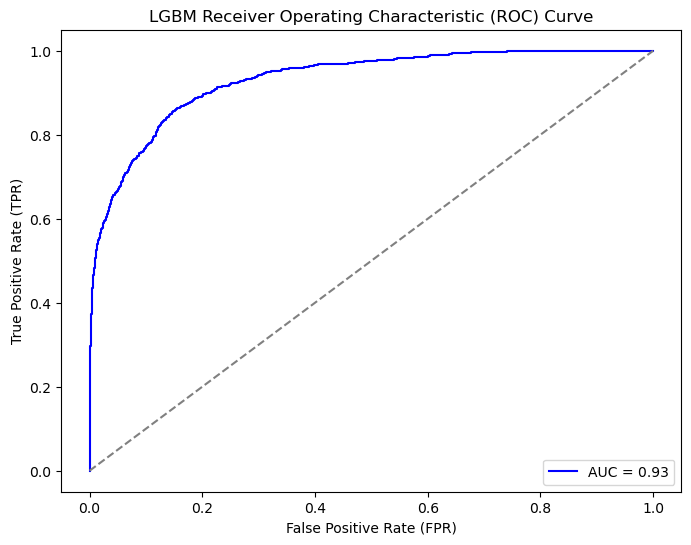

In [168]:
fpr, tpr, thresholds = roc_curve(y_val, probs)

auc = roc_auc_score(y_val, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('LGBM Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

### Exporting predictions to .csv file for Kaggle submission 

In [170]:
best_lgbm_model = best_model
trained_feature_order = best_lgbm_model.feature_name_
unknown_healthcare_data_reordered = unknown_healthcare_data[trained_feature_order]

lgbm_probabilities = best_lgbm_model.predict_proba(unknown_healthcare_data_reordered)[:, 1]
lgbm_predictions = (lgbm_probabilities > 0.4).astype(int)

lgbm_predictions_df = pd.DataFrame({
    "row ID": ['Row' + str(i) for i in unknown_healthcare_data.index],
    "Predicted-ExpiredHospital": lgbm_predictions
})

lgbm_predictions_df.to_csv("lgbm_predictions_17f_0.4_threshold_original_halvinggrid.csv", index=False)